In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
import fastbook
fastbook.setup_book()
from fastbook import *
from ipywidgets import *

In [3]:
import os
os.chdir ("D://AI project/jpg/lymph300")

In [4]:
from pathlib import Path

entries = Path()
for entry in entries.iterdir():
    print(entry.name)

alymp
blast
lymph


In [5]:
path = Path()

In [6]:
path = ("D://AI project/jpg/lymph300")

In [7]:
files = get_image_files(path)
len(files)

900

In [8]:
path_img = path

In [9]:
fnames = get_image_files(path_img)

In [10]:
fnames[:4]

(#4) [Path('D:/AI project/jpg/lymph300/alymp/LYT_0002.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0005.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0010.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0012.jpg')]

In [11]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, seed=42, bs=4, num_workers=0)

In [12]:
fns = get_image_files(path)
fns

(#900) [Path('D:/AI project/jpg/lymph300/alymp/LYT_0002.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0005.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0010.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0012.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0017.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0028.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0034.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0046.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0050.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0054.jpg')...]

In [21]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.444604,0.691875,0.266667,0.733333,00:52


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.009441,0.358859,0.150000,0.850000,01:11
1,0.643102,0.221430,0.088889,0.911111,01:11
2,0.648599,0.195899,0.061111,0.938889,01:11


In [22]:
learn.predict(files[0])

('alymp', tensor(0), tensor([9.9508e-01, 7.2038e-04, 4.1967e-03]))

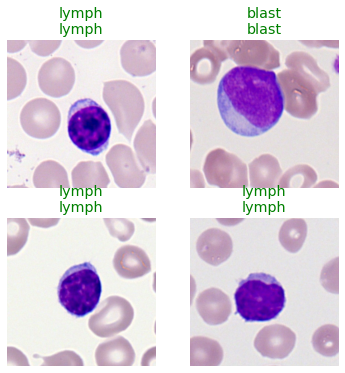

In [15]:
learn.show_results()

In [16]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.00036307806149125097, lr_steep=6.918309736647643e-06)

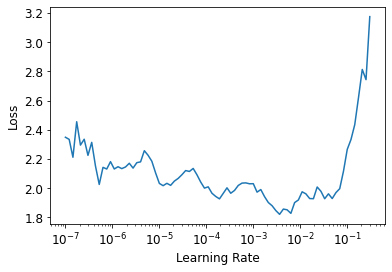

In [17]:
learn.lr_find()

In [17]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.364877,0.744409,0.288889,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.877343,0.343204,0.133333,01:09
1,0.720891,0.278037,0.111111,01:09


In [23]:
interp = Interpretation.from_learner(learn)

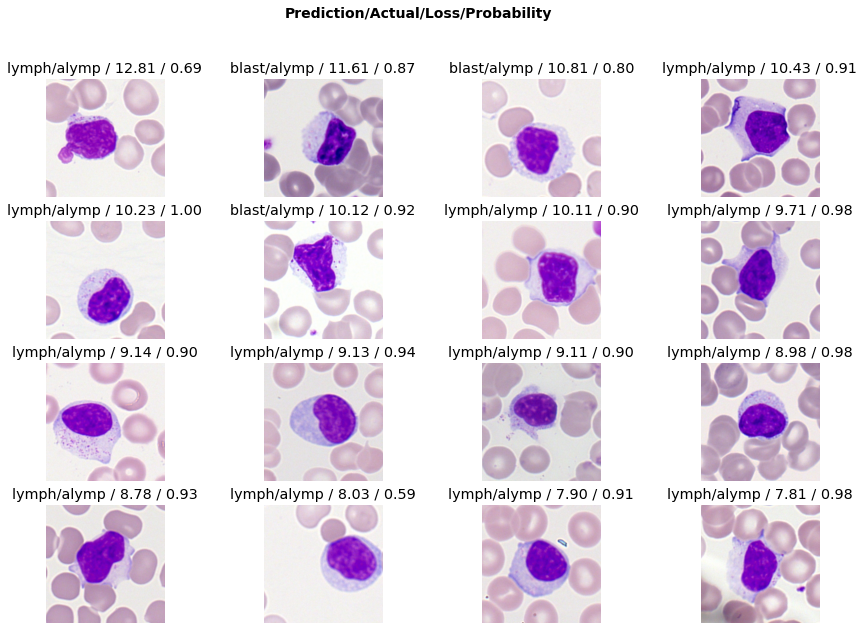

In [19]:
interp.plot_top_losses(16, figsize=(15,10))

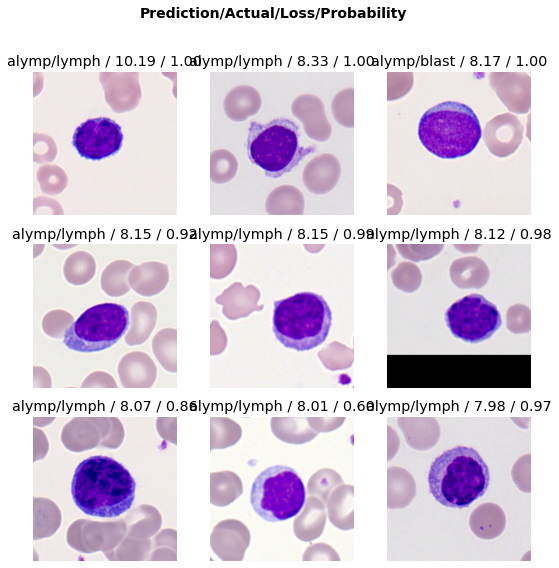

In [21]:
interp.plot_top_losses(9)

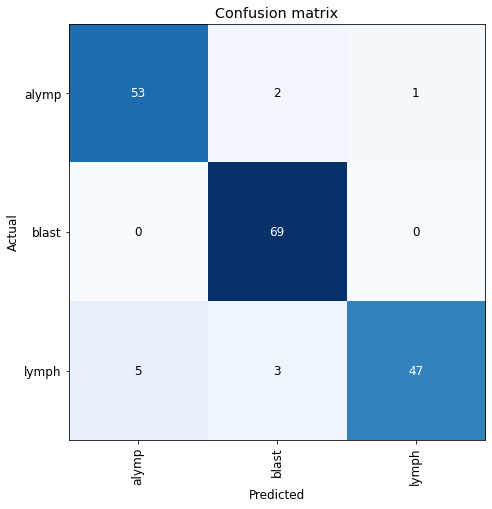

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

In [25]:
learn.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [28]:
learn_inf.predict(Path('D:/AI project/jpg/lymph300/blast/MYO_0252.jpg'))

('blast', tensor(1), tensor([1.3302e-04, 9.9860e-01, 1.2682e-03]))

In [29]:
learn_inf.dls.vocab

['alymp', 'blast', 'lymph']

In [30]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [31]:
img = PILImage.create(btn_upload.data[-1])

In [32]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [33]:
pred,pred_idx,probs = learn_inf.predict(img)

In [34]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: blast; Probability: 0.9304')

In [35]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [36]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [37]:
btn_upload = widgets.FileUpload()

In [43]:
from ipywidgets import *

In [38]:
VBox([widgets.Label('Select your cell!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [39]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

The system cannot find the path specified.


The system cannot find the path specified.
Enabling: voila
- Writing config: C:\Users\m\Anaconda3\envs\fbook\etc\jupyter
    - Validating...
      voila 0.2.7 ok
